In [56]:
import nbsetup
import numpy as np
import seaborn as sns
from models.space import Space
from models.simulation import Simulation
from models.equations import null_gravity

In [97]:
disk = (1,10)
points = 100
calcs = 20
space = Space((points, points, points))
r, z = space.rz()
mass = 1e10*np.exp(-r)*np.exp(-z)

In [98]:
sim = Simulation([mass], space)

In [99]:
sim.analyse(space.radius_list[::points//calcs])

In [100]:
df = sim.dataframe()

In [101]:
df

,z,y,x,component,z_vec,y_vec,x_vec,z_abs,y_abs,x_abs,F_vec,F_abs
0,50,50,50,mass 0,-4.921488e-12,-4.895686e-12,-7.745018e-14,70493.574924,82265.498472,82265.498472,6.942246e-12,136031.498496
1,50,50,55,mass 0,-1.835740e-13,2.832319e-13,2.406689e+04,4952.975718,7621.553290,24748.952965,2.406689e+04,26365.331704
2,50,50,60,mass 0,-3.532106e-15,-1.707099e-14,6.189926e+03,555.082940,812.626494,6194.758503,6.189926e+03,6272.440657
3,50,50,65,mass 0,-6.730146e-15,-1.112257e-15,2.714438e+03,156.028769,221.290644,2714.471772,2.714438e+03,2727.942728
4,50,50,70,mass 0,-2.446294e-16,7.163169e-16,1.520690e+03,65.071035,91.223839,1520.690025,1.520690e+03,1524.812835
5,50,50,75,mass 0,1.664686e-16,1.111578e-15,9.716159e+02,33.179094,46.267301,971.615883,9.716159e+02,973.282559
6,50,50,80,mass 0,-1.059756e-15,1.731581e-16,6.741540e+02,19.162577,26.644437,674.154025,6.741540e+02,674.952428
7,50,50,85,mass 0,5.430119e-16,3.669839e-16,4.950482e+02,12.053794,16.730790,495.048192,4.950482e+02,495.477472
8,50,50,90,mass 0,1.814303e-17,3.770321e-16,3.789001e+02,8.069428,11.187706,378.900089,3.789001e+02,379.151102
9,50,50,95,mass 0,-3.316769e-16,2.245707e-16,2.993130e+02,5.664761,7.847664,299.313041,2.993130e+02,299.469484


<AxesSubplot:xlabel='x'>

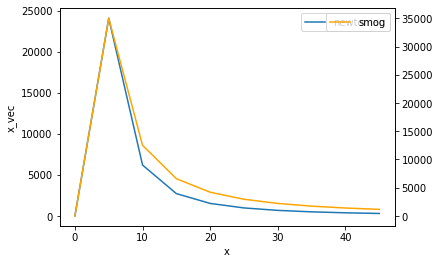

In [104]:
r = df['x']-df['x'][0]
g = sns.lineplot(x=r, y=df['x_vec'], label='newtonian')
sns.lineplot(x=r, y=null_gravity(df['x_vec'], df['F_abs'], 20, 0.25), label='smog', ax=g.twinx(), color='orange')